### Récupération des données

In [1]:
import pandas as pd
cardio_data= pd.read_csv(r'cardio_train.csv',sep=";")
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Analyse de valeurs manquantes

In [2]:
cardio_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Le jeu de données ne comportent aucune valeur nulle.

### Taille du jeu de données 

In [3]:
cardio_data.shape

(70000, 13)

Le jeu de données comporte 70 000 lignes et 13 colonnes.

### Statistiques des données

In [4]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


En analysant ce tableau, on remarque que le minimum et le maximum pour certaines variables (par exemple les valeurs de la tension artérielle systolique et de la pression sanguine diastolique) sont hors limites normales.

### Visualisation et analyse de données avec Matplotlib

In [5]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,3,figsize=(10,10))

ax[0][0].hist(list(cardio_data['age']),color = 'blue',edgecolor = 'red')
ax[0][0].set_xlabel('Age '+'('+'jours)')
ax[0][0].set_ylabel('Fréquence')
ax[0][0].set_title('Histograme d\'âge')

ax[0][1].hist(list(cardio_data['weight']),color = 'blue',edgecolor = 'red')
ax[0][1].set_xlabel('Poids '+'('+'kg)')
ax[0][1].set_ylabel('Fréquence')
ax[0][1].set_title('Histograme de poids')

ax[0][2].hist(list(cardio_data['height']),color = 'blue',edgecolor = 'red')
ax[0][2].set_xlabel('Taille'+' ('+'cm)')
ax[0][2].set_ylabel('Fréquence')
ax[0][2].set_title('Histograme de la taille')

ax[1][0].hist(list(cardio_data['ap_hi']),color = 'blue',edgecolor = 'red')
ax[1][0].set_xlabel('Valeur ap_hi')
ax[1][0].set_ylabel('Fréquence')
ax[1][0].set_title('valeurs haute de la tension')

ax[1][1].hist(list(cardio_data['ap_lo']),color = 'blue',edgecolor = 'red')
ax[1][1].set_xlabel('Valeur ap_lo')
ax[1][1].set_ylabel('Fréquence')
ax[1][1].set_title('valeurs basse de la tension')
ax[1,2].set_axis_off()
plt.tight_layout()

A la lumière de ces histogrammes, on voit que un peu plus de 12000 personnes ont un âge autour de 54,7 ans (20 000 jours/365), à peu près 35000 personnes ont un poids autour de 70 kg, plus de 50 000 personnes ont une taille de entre 150 et 180 cm. Les chiffres visualisées sur l'axe des X montrent que les données des valeurs de la tension artérielle systolique et de la pression sanguine diastolique contiennent sûrement des valeurs aberrantes, ce qui est en adéquation avec les imperfections observées dans le tableau de données statistiques (valeurs du minimum et du maximum hors limites normales).

### Visualisation et analyse de données avec Seaborn

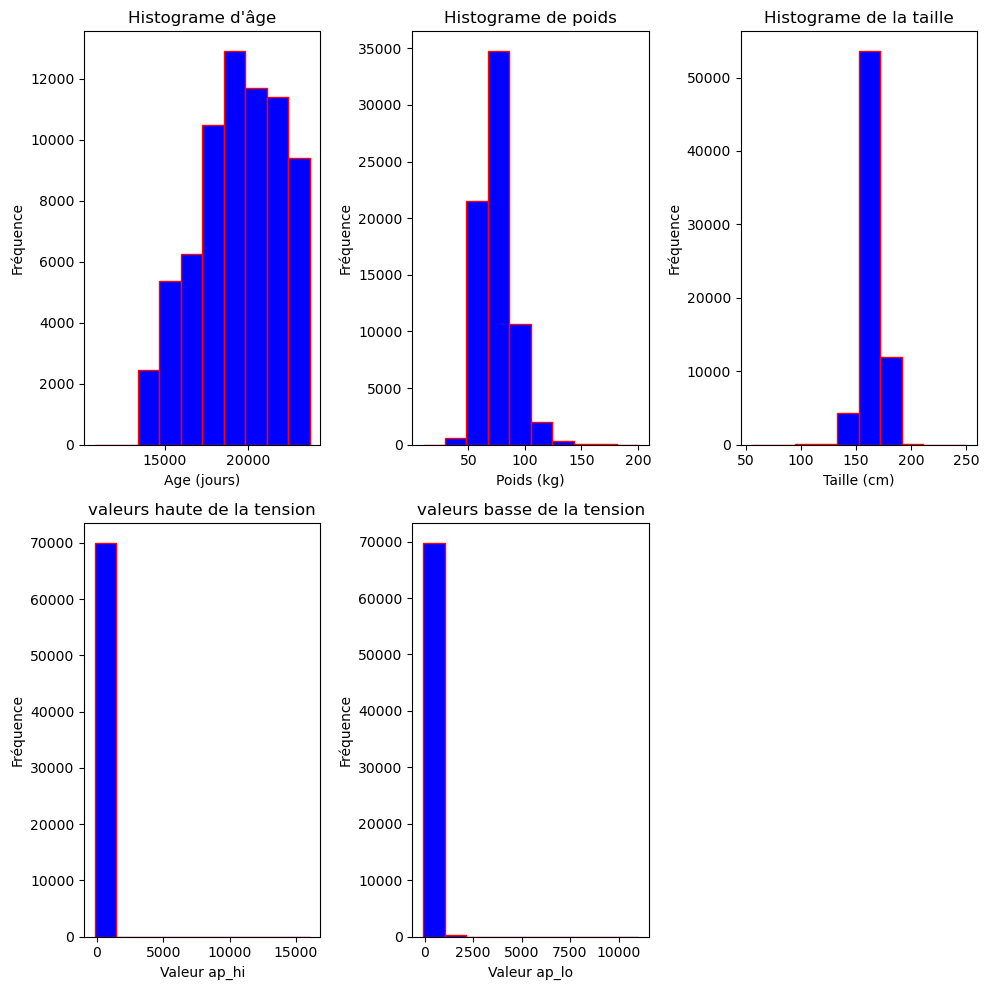

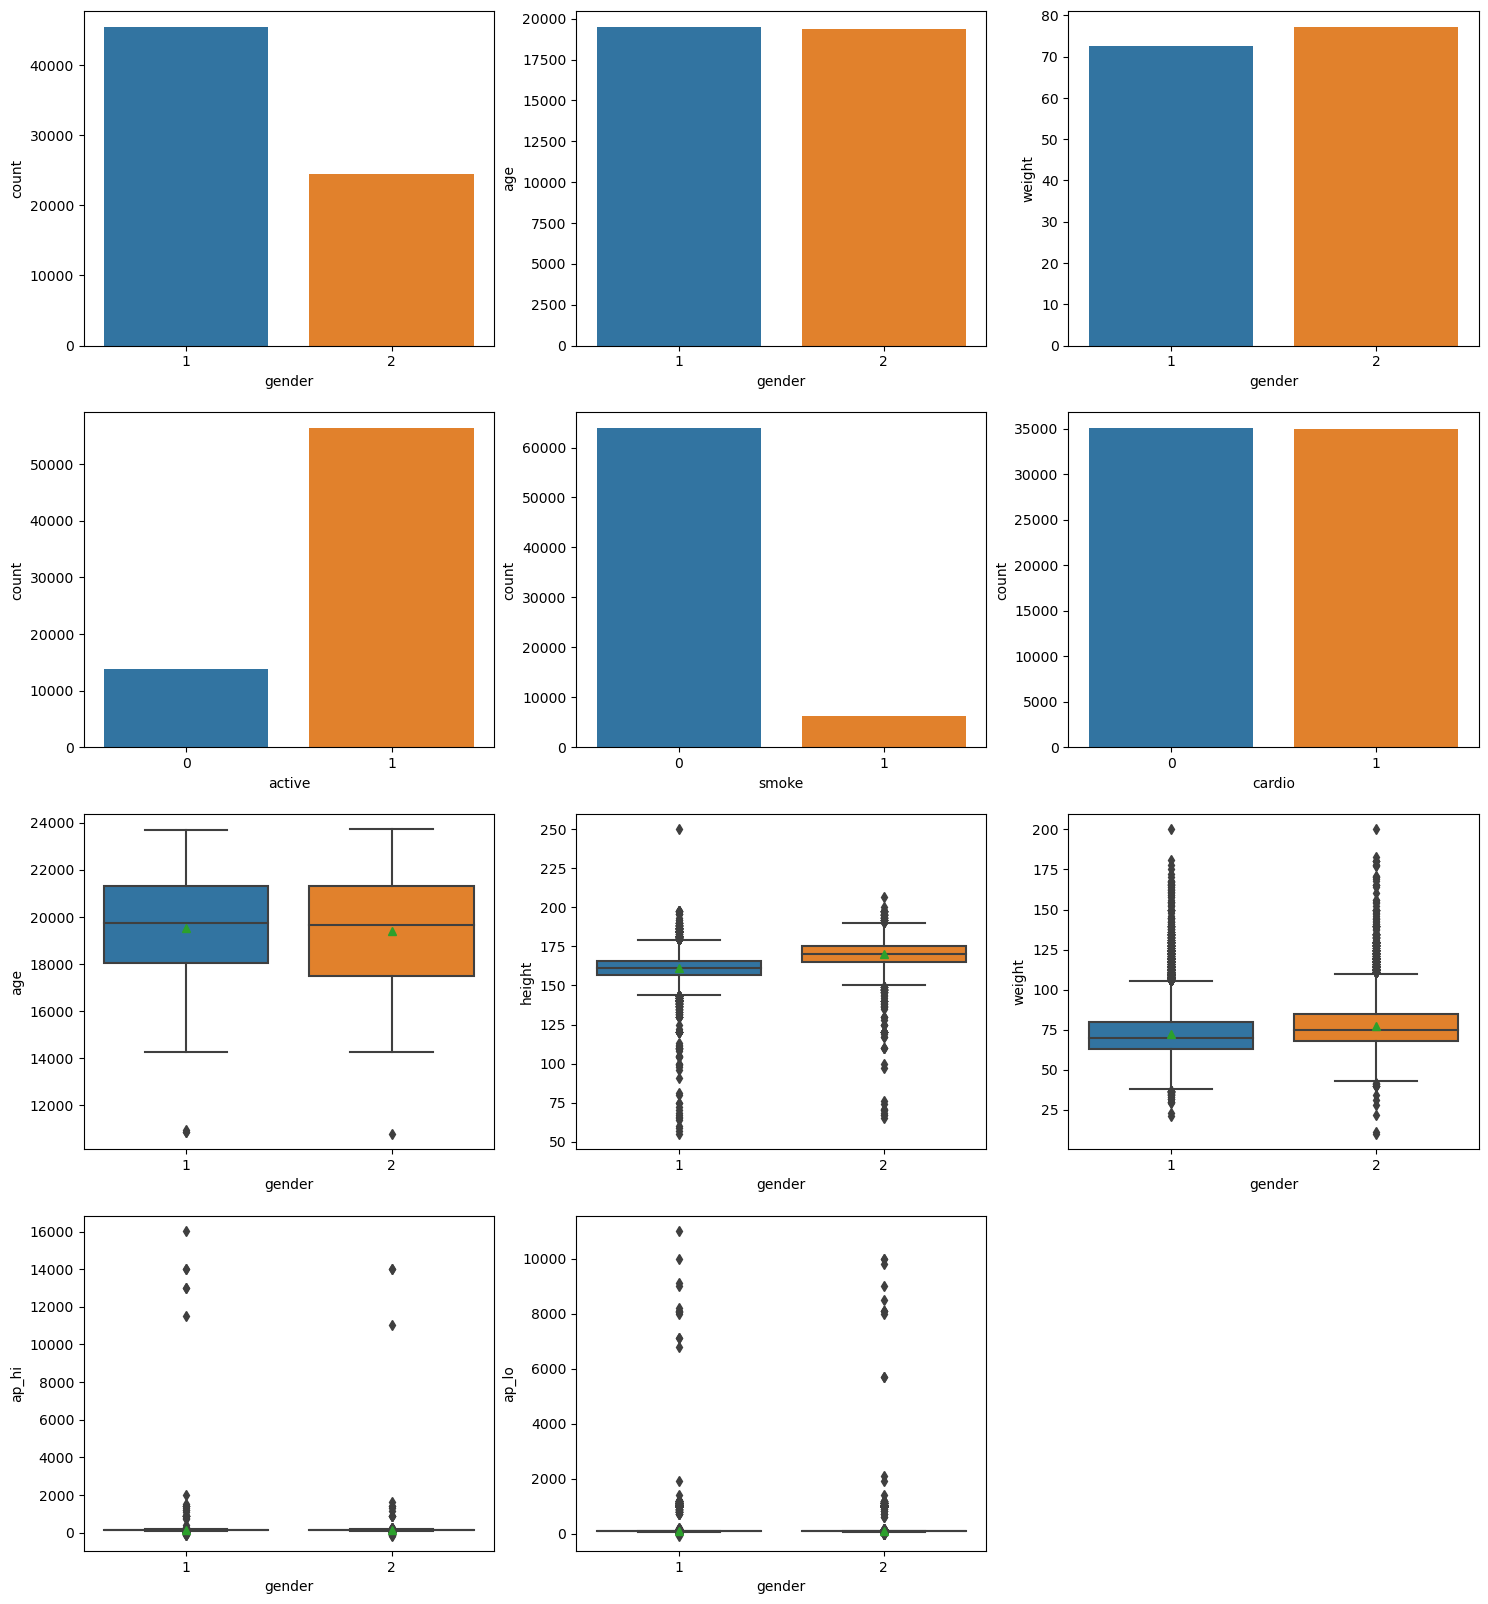

In [6]:
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
sns.countplot(ax=axes[0, 0], data=cardio_data, x='gender');
sns.barplot(ax=axes[0, 1], data=cardio_data,x='gender',y='age',ci=None);
sns.barplot(ax=axes[0, 2], data=cardio_data, x='gender',y='weight',ci=None);
sns.countplot(ax=axes[1, 0],data=cardio_data,x="active");
sns.countplot(ax=axes[1, 1], data=cardio_data,x="smoke");
sns.countplot(ax=axes[1, 2], data=cardio_data,x="cardio")
sns.boxplot(ax=axes[2, 0], data=cardio_data,x="gender",y="age",showmeans=True)
sns.boxplot(ax=axes[2, 1], data=cardio_data,x="gender",y="height",showmeans=True)
sns.boxplot(ax=axes[2, 2], data=cardio_data,x="gender",y="weight",showmeans=True)
sns.boxplot(ax=axes[3, 0], data=cardio_data,x="gender",y="ap_hi",showmeans=True)
sns.boxplot(ax=axes[3, 1], data=cardio_data,x="gender",y="ap_lo",showmeans=True)
axes[3,2].set_axis_off()

plt.show()

Au regard de ces figures, on remarque dans ce jeu de données qu'il y a plus d'hommes que de femmes, que l'âge maximal est le même pour les hommes et les femmes, que le poids maximal est plus grand chez les hommes comparé à celui des femmes. On constate également que le nombre de personnes actives est très supérieur à celui des personnes non actives, qu'il y a très peu de personnes qui fument comparé au nombre de non fumeurs et que le nombre de personnes à risques cardio-vasculaires est égal à celui des personnes sans risques.

Les figures sur lesquelles sont visualisées la distribution de données montrent partout les valeurs moyennes proches des valeurs médianes mais aussi beaucoup de données aberrantes sauf pour la variable "âge".

#### Etude des corrélations entre les variables

In [7]:
new_cardio_data=cardio_data.drop(columns=['id'])
corr=new_cardio_data.corr()
fig, ax = plt.subplots(figsize=(15,15))  
ax=sns.heatmap(
    corr,
    vmin=-1, vmax=1,center=0,
    cmap=sns.diverging_palette(0,220,n=200),
    square=True,
    annot=True,
    ax=ax
)

La matrice des corrélations montre qu'il existe de très fortes correlations entre le risque cardio-vasculaire et l'âge, le poids et le cholestérol. Les corrélations pour les autres variables sont faibles mais pas nulles sauf pour les variables "genre" et "boire" où les corrélations avec le risque cardio-vasculaire est proche de zéro.

#### Elimination des données aberrantes

In [8]:
Q1 = cardio_data.quantile(0.25)
Q3 = cardio_data.quantile(0.75)
IQR = Q3 - Q1
cardio_data = cardio_data[~((cardio_data < (Q1 - 1.5 * IQR)) |(cardio_data > (Q3 + 1.5 * IQR))).any(axis=1)]
cardio_data.shape

(38023, 13)

Après l'élimination des valeurs aberrantes, il ne reste dans le jeu de données que 38023 lignes.

#### Visualisation des distributions des données renettoyées 

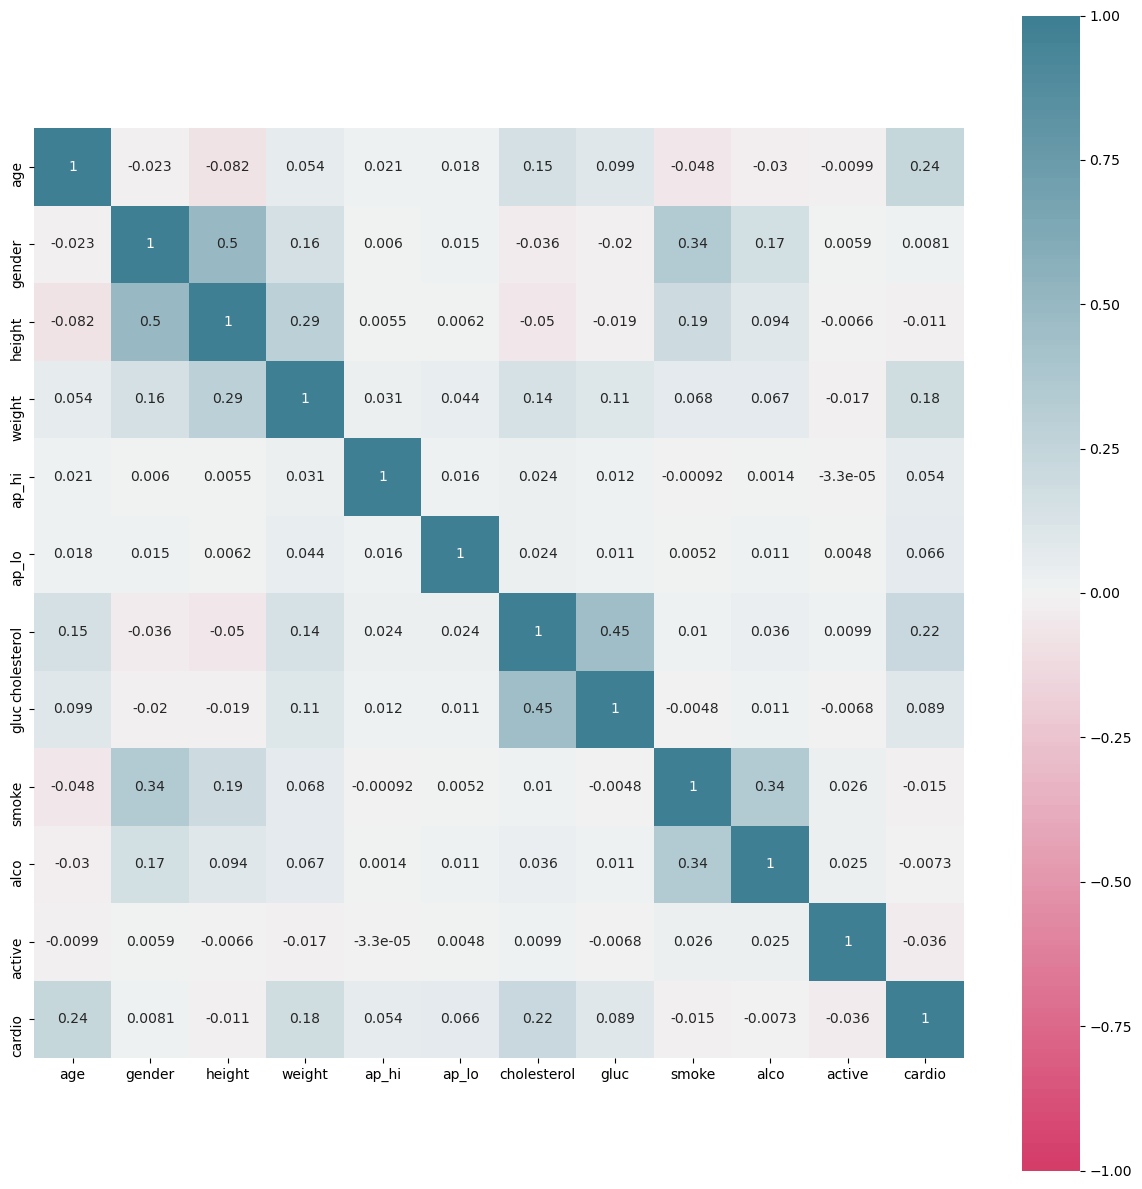

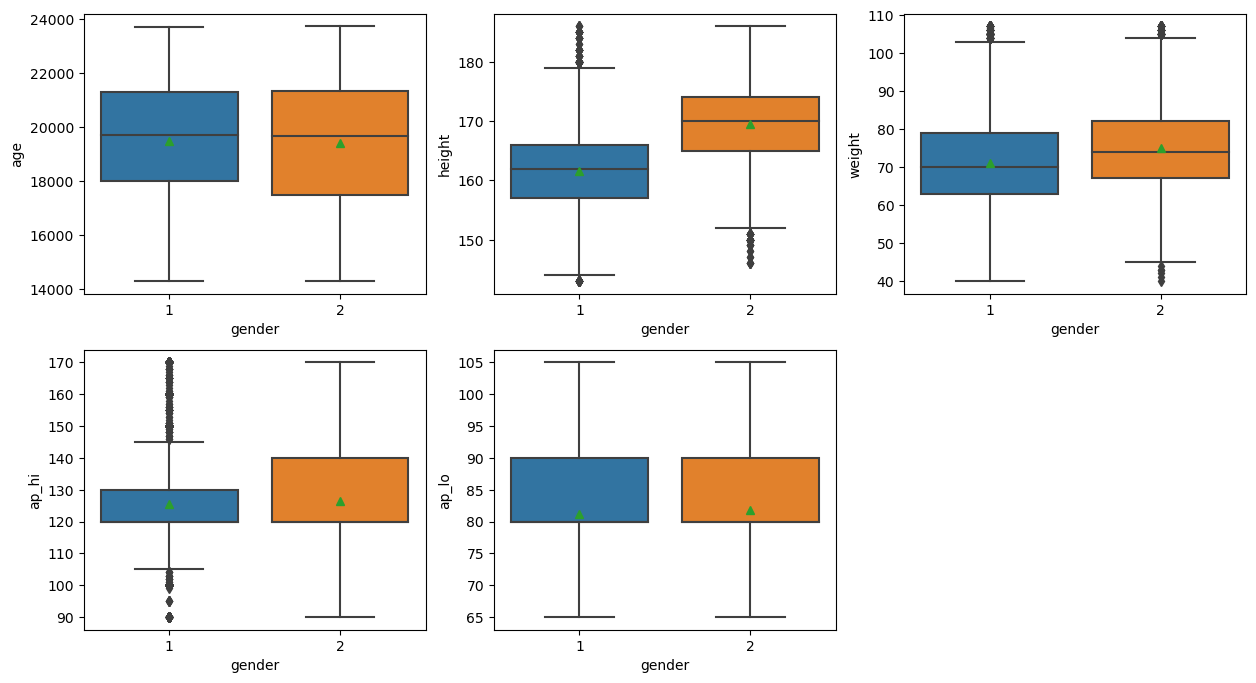

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.boxplot(ax=axes[0, 0], data=cardio_data,x="gender",y="age",showmeans=True)
sns.boxplot(ax=axes[0, 1], data=cardio_data,x="gender",y="height",showmeans=True)
sns.boxplot(ax=axes[0, 2], data=cardio_data,x="gender",y="weight",showmeans=True)
sns.boxplot(ax=axes[1, 0], data=cardio_data,x="gender",y="ap_hi",showmeans=True)
sns.boxplot(ax=axes[1, 1], data=cardio_data,x="gender",y="ap_lo",showmeans=True)
axes[1,2].set_axis_off()
plt.show()

Les figures ci-dessus montrent bien que les valeurs aberrantes observées précédemment ont été largement éliminées. 

#### Matrice des corrélations après le renettoyage des données

In [10]:
new_cardio_data=cardio_data.drop(columns=['id'])
corr=new_cardio_data.corr()
fig, ax = plt.subplots(figsize=(15,15))  
ax=sns.heatmap(
    corr,
    vmin=-1, vmax=1,center=0,
    cmap=sns.diverging_palette(0,220,n=200),
    square=True,
    annot=True,
    ax=ax
)

La matrice des corrélations montre qu'après le renettoyage des données, les variables "glucose", "fumer", "boire" et "actif" ne sont plus pertinentes pour la modélisation du risque cardio-vasculaire pour ce jeu de données (corrélations nulles).

In [11]:
cardio_data.groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49984.607047,18888.608189,1.294739,164.130372,70.506757,119.769032,78.888734,1.125360,1.0,0.0,0.0,1.0
1,50091.684888,20060.547921,1.297040,163.728697,74.259130,132.423040,84.168075,1.372517,1.0,0.0,0.0,1.0


A la lumière de ce tableau, on voit par exemple que le risque d'avoir des problèmes cardio-vasculaires augmente avec l'âge, le poids, la tension artérielle.

### Régression logistique

#### Régression logistique avec Scikit-Learn

Confusion matrix for Logistic Regression
[[3341  737]
 [1311 2216]]

Normalized confusion matrix for Logistic Regression
[[0.81927415 0.18072585]
 [0.371704   0.628296  ]]



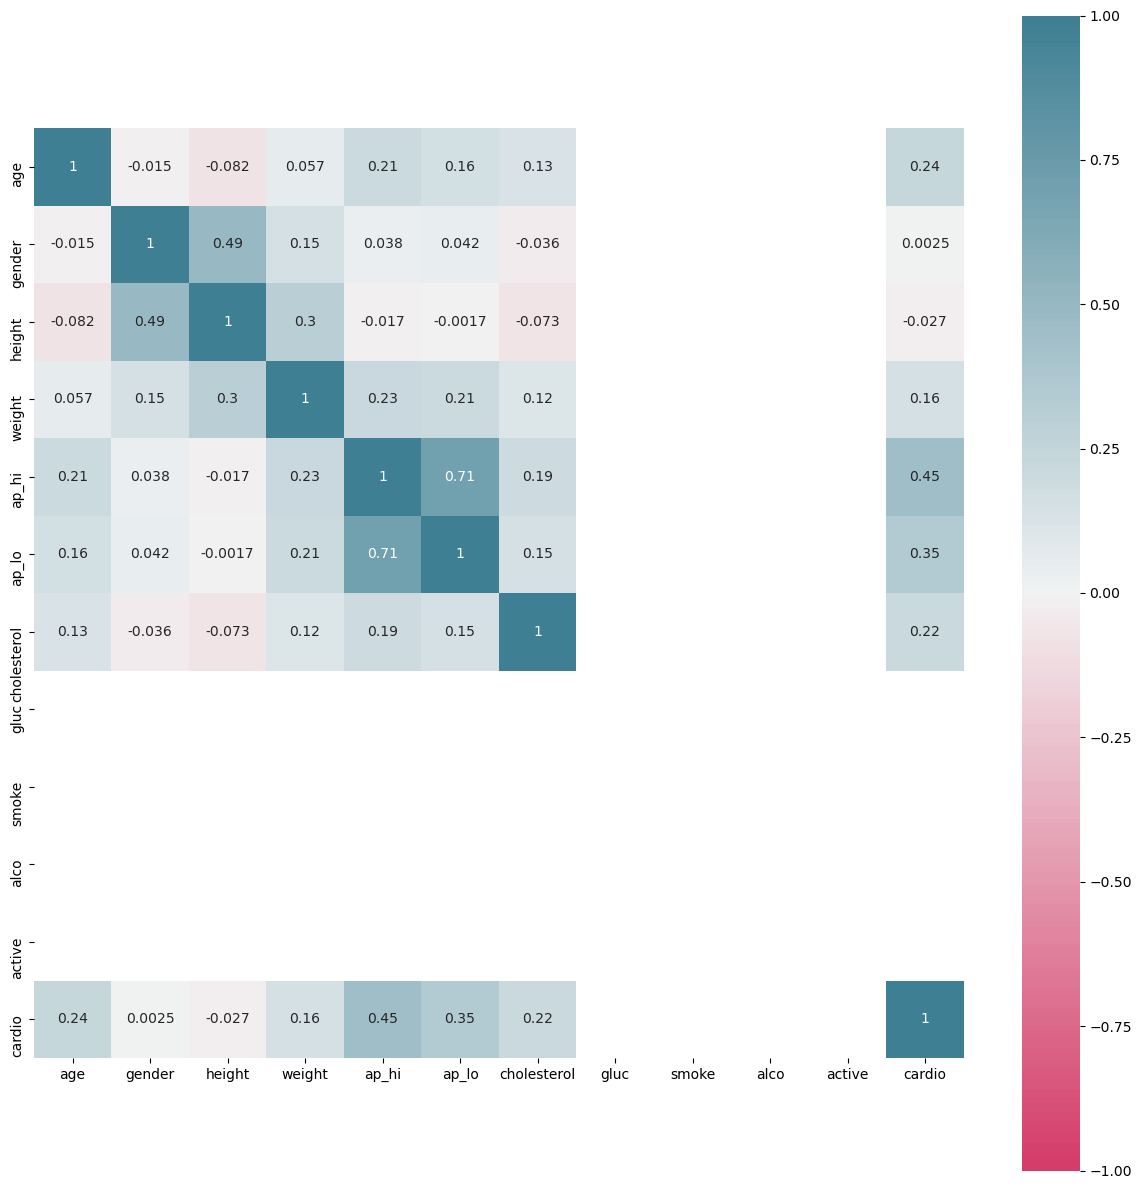

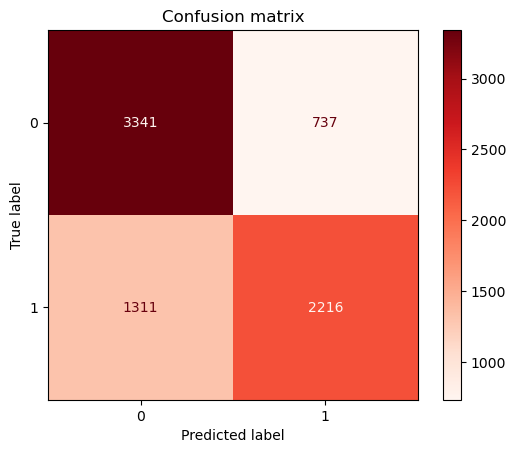

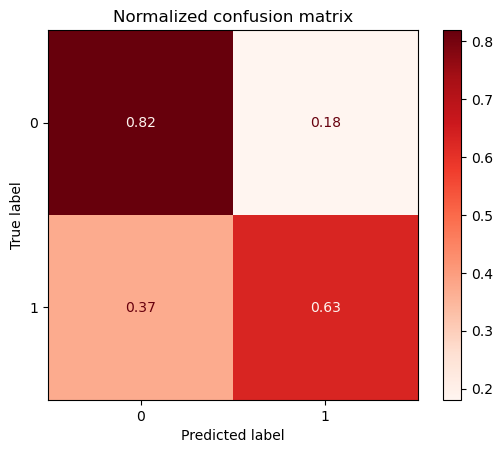

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      4078
           1       0.75      0.63      0.68      3527

    accuracy                           0.73      7605
   macro avg       0.73      0.72      0.72      7605
weighted avg       0.73      0.73      0.73      7605

----------------Rapport de la classification-----------------------------
Fraction de données prédite correctement(accuracy) = 0.7307034845496384
Fraction de données prédites positives et qui le sont effectivement(precision)= 0.7504232983406705
Fraction de données positives et qui sont prédites positives(recall)= 0.6282960022682166
Moyenne pondérée des données positives qui sont prédites positives et des données prédites positives qui le sont effectivement(f1)= 0.6839506172839507


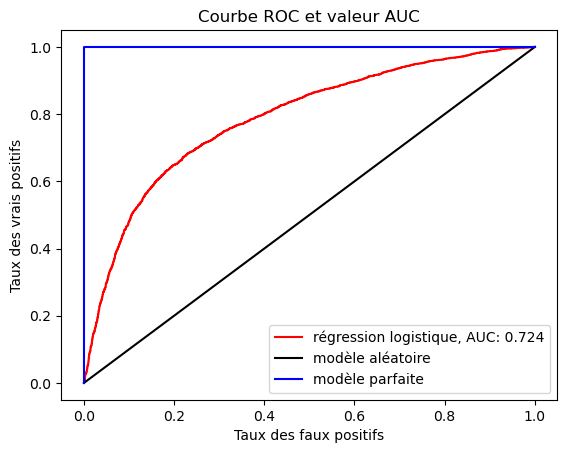

In [12]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split #Pour la subdivision du jeu de données
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
X_multi=pd.DataFrame(np.c_[cardio_data['age'],cardio_data['gender'],cardio_data['height'],cardio_data['weight'],cardio_data['ap_hi'],cardio_data['ap_lo'],cardio_data['cholesterol']], columns = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol'])
Y_multi=pd.DataFrame(np.c_[cardio_data['cardio']])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_multi)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_maxabs,Y_multi.to_numpy().flatten(), test_size = 0.2, random_state=5)# subdivision: 80% données entrainement du modèle, 20% données test
regressionmodel =LogisticRegression(solver='liblinear', random_state=0)
regressionmodel.fit(X_train, Y_train)# entrainement du modèle sur le jeu de données d'entrainement
y_test_predict = regressionmodel.predict(X_test)#prédiction sur le jeu de données de test
y_test_predict_proba=regressionmodel.predict_proba(X_test)
#-----------Affiche de résultats----------------------
#la matrice de confusion
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(regressionmodel, X_test, Y_test,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
    print()

plt.show()
#accuracy
accuracy=accuracy_score(Y_test, y_test_predict)
#precision
precision=precision_score(Y_test, y_test_predict)
#recall
recall=recall_score(Y_test, y_test_predict)
#f1
f1=f1_score(Y_test, y_test_predict)
#roc_curve
fpr, tpr,threshold=roc_curve(Y_test, y_test_predict_proba[:,1])
#roc_auc_score
auc=roc_auc_score(Y_test, y_test_predict)
#---------------Rapport de classification
report=classification_report(Y_test, y_test_predict)
print(report)
print('----------------Rapport de la classification-----------------------------')
print("Fraction de données prédite correctement"+'(accuracy'+") = {}".format(accuracy))
print("Fraction de données prédites positives et qui le sont effectivement"+'(precision'+")= {}".format(precision)) 
print("Fraction de données positives et qui sont prédites positives"+'(recall'+")= {}".format(recall)) 
print("Moyenne pondérée des données positives qui sont prédites positives et des données prédites positives qui le sont effectivement"+'(f1'+")= {}".format(f1))


#Courbe ROC et valeur AUC
plt.plot(fpr,tpr,label='régression logistique, AUC: %.3f'%auc,c='r')
plt.plot([0,1],[0,1],label='modèle aléatoire'%auc,c='k')
plt.plot([0,0,1,1],[0,1,1,1],label='modèle parfaite'%auc,c='b')
plt.xlabel('Taux des faux positifs')
plt.ylabel('Taux des vrais positifs')
plt.title('Courbe ROC et valeur AUC')
plt.legend()
plt.show()

#### Implémentation de la classe LogisticRegression

[[3355  723]
 [1373 2154]]


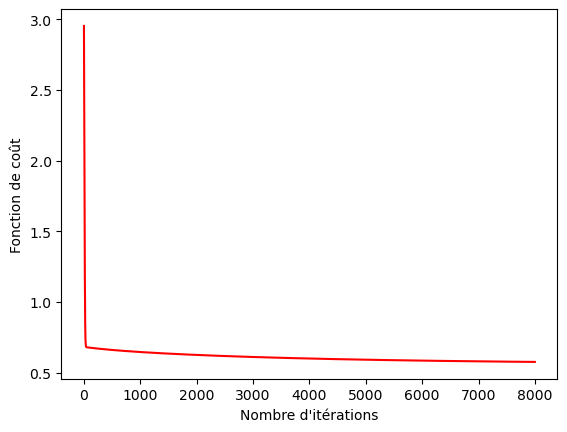

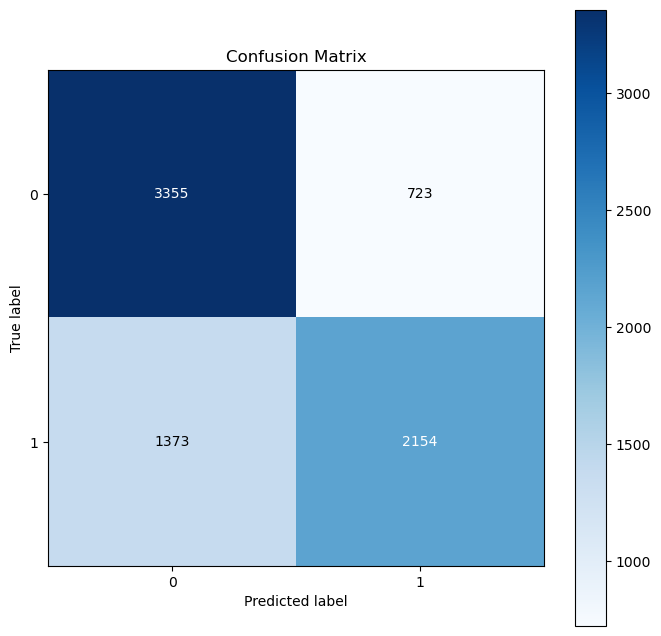

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4078
           1       0.75      0.61      0.67      3527

    accuracy                           0.72      7605
   macro avg       0.73      0.72      0.72      7605
weighted avg       0.73      0.72      0.72      7605



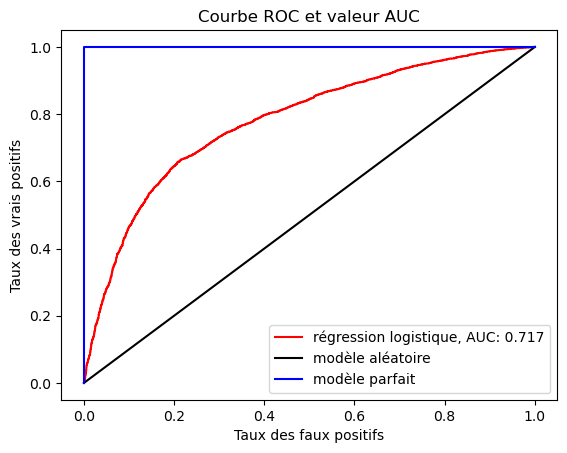

In [13]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
import scikitplot as skplt
class LogisticRegression_created:
    def __init__(self):
        self.self=self
    
    def model(self,X,Theta):
        proba=1./(1.+np.exp(-np.matmul(X,Theta)))
        proba=proba.flatten()
        return proba
    def cost_function(self,X, Y, theta):
        return (-1./len(Y)) * np.sum(Y.dot(np.log(self.model(X, theta)))+(1.-Y).dot(np.log(1-self.model(X, theta))))
    
    def gradient(self,X,Theta,Y):
        return (1./len(Y))* X.T.dot(self.model(X, Theta) - Y)
    
    def gradientdescent(self,X,theta,Y, learning_rate, nb_iterations):
        cost_history=[]
        for i in range(0, nb_iterations):
            theta = theta - learning_rate * self.gradient(X,theta,Y)
            cost_history.append(self.cost_function(X, Y, theta))
        return theta,cost_history
   
    def fit(self,X,theta,Y,learning_rate, nb_iterations):
        return self.gradientdescent(X,theta,Y, learning_rate, nb_iterations)
   
X_multi2=pd.DataFrame(np.c_[cardio_data['age'],cardio_data['gender'],cardio_data['height'],cardio_data['weight'],cardio_data['ap_hi'],cardio_data['ap_lo'],cardio_data['cholesterol']], columns = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol'])
Y_multi2=pd.DataFrame(np.c_[cardio_data['cardio']])
x0 = np.ones((len(X_multi2),1)) #
X_extended=np.hstack((x0,X_multi2))# Ajout de la colonne [1 1 1 1....1] à la matrice X
max_abs_scaler2 = preprocessing.MaxAbsScaler()
X_train_maxabs2 = max_abs_scaler.fit_transform(X_extended)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train_maxabs2,Y_multi2.to_numpy().flatten(), test_size = 0.2, random_state=5)# subdivision: 80% données entrainement du modèle, 20% données test
learning_rate=0.1
nb_iterations=8000
theta = [1]*len(X_train2[0])
regressionmodel_created=LogisticRegression_created()
Theta, cost_history=regressionmodel_created.fit(X_train2,theta,Y_train2,learning_rate,nb_iterations)
#Affichachage de la variation de la fonction de coût
x=range(nb_iterations)
plt.plot(x,cost_history,'r')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Fonction de coût')
#-----test-----------------------------------
y_test_predict_proba2=regressionmodel_created.model(X_test2,Theta)
y_test_predict2 = np.array(list(map(round,y_test_predict_proba2)))
y_test_predict2 = y_test_predict2.astype(int)
#-----------Affiche de résultats----------------------
#la matrice de confusion
confusion_matrix2 = confusion_matrix(Y_test2, y_test_predict2)#calcul de la matrice de confusion
print(confusion_matrix2)
skplt.metrics.plot_confusion_matrix(
    Y_test2, 
    y_test_predict2,
    figsize=(8,8))
plt.show()
#rapport de classification
report2=classification_report(Y_test2, y_test_predict2)
print(report2)

#Courbe ROC et valeur AUC
fpr2, tpr2,threshold2=roc_curve(Y_test2, y_test_predict_proba2) #roc_curve
auc2=roc_auc_score(Y_test2, y_test_predict2) #roc_auc_score
plt.plot(fpr2,tpr2,label='régression logistique, AUC: %.3f'%auc2,c='r')
plt.plot([0,1],[0,1],label='modèle aléatoire',c='k')
plt.plot([0,0,1,1],[0,1,1,1],label='modèle parfait',c='b')
plt.xlabel('Taux des faux positifs')
plt.ylabel('Taux des vrais positifs')
plt.title('Courbe ROC et valeur AUC')
plt.legend()
plt.show()

Les résultats ci-dessus montrent que la classe "Régression logistique" implémentée présentent des performances comparables à celles de la classe de la bibliothèque scikit-learn.

#### Prédiction pour Monsieur Arthur (53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données)

In [14]:
somme=0
compteur=0
mediane_ap_lo=cardio_data['ap_lo'].describe()['50%']
troisiemequartile_ap_lo=cardio_data['ap_lo'].describe()['75%']
moyenne_ap_hi=cardio_data['ap_hi'].describe()['mean']
for data in cardio_data['ap_lo']:
   if mediane_ap_lo<=data<=troisiemequartile_ap_lo:
    somme=somme+data
    compteur+=1

moyenne_ap_lo=somme/compteur
##Prédiction avec la classe LogisticRegression
X_arthur=np.array([[53*365,2,175,85,moyenne_ap_hi,moyenne_ap_lo,2]], np.int64)
X_arthur_maxabs = max_abs_scaler.fit_transform(X_arthur)
y_arthur_predict= regressionmodel.predict(X_arthur_maxabs)
y_arthur_predict_proba=regressionmodel.predict_proba(X_arthur_maxabs)
##Prédiction avec la classe LogisticRegression_created
X_arthur2=np.array([[1,53*365,2,175,85,moyenne_ap_hi,moyenne_ap_lo,2]], np.int64)
X_arthur_maxabs2 = max_abs_scaler2.fit_transform(X_arthur2)
y_arthur_predict_proba2=regressionmodel_created.model(X_arthur_maxabs2,Theta)
y_arthur_predict2 = np.array(list(map(round,y_arthur_predict_proba2)))
print("Résultat de la prédiction avec la classe LogisticRegression de scikit-learn= {}".format(y_arthur_predict[0]))
print("Probabilité de la prédiction avec la classe LogisticRegression de scikit-learn= {:.2f}".format(y_arthur_predict_proba[0][1]))
print("Résultat de la prédiction avec la classe LogisticRegression créée= {}".format(y_arthur_predict2[0]))
print("Probabilité de la prédiction avec la classe LogisticRegression créée= {:.2f}".format(y_arthur_predict_proba2[0]))


Résultat de la prédiction avec la classe LogisticRegression de scikit-learn= 1
Probabilité de la prédiction avec la classe LogisticRegression de scikit-learn= 0.99
Résultat de la prédiction avec la classe LogisticRegression créée= 1
Probabilité de la prédiction avec la classe LogisticRegression créée= 0.95


Les prédictions obtenues avec les modèles de régression des deux classes montrent que Monsieur Arthur est un sujet à risques cardio-vasculaires.